In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [29]:
reviews = pd.read_csv('../rawdata/processed_reviews.csv')
summary = pd.read_csv('../rawdata/processed_summary.csv')

In [30]:
print(reviews.columns)
print(summary.columns)

Index(['rating', 'title_x', 'text', 'asin', 'timestamp', 'helpful_vote',
       'title_y', 'features', 'price', 'sentiment_title', 'sentiment_text',
       'combined_sentiment'],
      dtype='object')
Index(['asin', 'avg_rating', 'num_reviews', 'price', 'title_y', 'features',
       'os', 'color', 'total_negative', 'total_positive',
       'value_for_money_score', 'sentiment_ratio_positive',
       'first_review_date', 'last_review_date', 'review_period_hours',
       'review_frequency'],
      dtype='object')


In [31]:
# Convert the timestamp column to datetime format
reviews['timestamp'] = pd.to_datetime(reviews['timestamp'])

In [32]:
reviews.head()

,rating,title_x,text,asin,timestamp,helpful_vote,title_y,features,price,sentiment_title,sentiment_text,combined_sentiment
0,5,Fast!,I have been using laptops for the past 30 year...,B089HR6CQP,1970-01-01 00:26:41.470,0,"FusionTech Gaming G3 15 3500, 15.6 inch FHD La...",[15.6 inch FHD (1920 x 1080) 120Hz 250 nits WV...,799.0,1,1.0,2.0
1,5,Works Great - No Problems - Great Value for Price,"I read a bunch of negative reviews, so I wante...",B089HR6CQP,1970-01-01 00:27:06.710,0,"FusionTech Gaming G3 15 3500, 15.6 inch FHD La...",[15.6 inch FHD (1920 x 1080) 120Hz 250 nits WV...,799.0,1,1.0,2.0
2,5,Excellent gaming computer for the price,"Runs smooth, fast, and works well for gaming. ...",B089HR6CQP,1970-01-01 00:26:54.820,0,"FusionTech Gaming G3 15 3500, 15.6 inch FHD La...",[15.6 inch FHD (1920 x 1080) 120Hz 250 nits WV...,799.0,1,1.0,2.0
3,1,Overheating on setup,I'm impressed. I've never seen a computer so w...,B089HR6CQP,1970-01-01 00:27:06.820,0,"FusionTech Gaming G3 15 3500, 15.6 inch FHD La...",[15.6 inch FHD (1920 x 1080) 120Hz 250 nits WV...,799.0,-1,-1.0,-2.0
4,1,Don’t buy,"I bought 2 of these laptops, asked for replace...",B089HR6CQP,1970-01-01 00:26:51.410,22,"FusionTech Gaming G3 15 3500, 15.6 inch FHD La...",[15.6 inch FHD (1920 x 1080) 120Hz 250 nits WV...,799.0,-1,-1.0,-2.0


In [33]:
summary.head()

,asin,avg_rating,num_reviews,price,title_y,features,os,color,total_negative,total_positive,value_for_money_score,sentiment_ratio_positive,first_review_date,last_review_date,review_period_hours,review_frequency
0,B004PANKIA,5.000000,1,NaN,FusionTech ABC 15 Laptop - High-Octane Enterta...,"[Genuine Windows 7 Home Premium, 64bit, Intel ...",Windows 7;,Silver,0,1,NaN,1.000000,1970-01-01 00:21:46.520,1970-01-01 00:21:46.520,0.000000,inf
1,B0052F35I2,3.750000,12,NaN,"FusionTech ABC 17 Laptop, i7-2630QM, 8GB DDR3 ...","[Intel Core i7 Processor 2GHz, 6GB DDR3 RAM, 6...",Windows 7,NaN,3,9,NaN,0.750000,1970-01-01 00:22:02.840,1970-01-01 00:24:03.560,0.033533,357.852883
2,B0057CAGUA,5.000000,1,NaN,FusionTech Worktop 17R i17R Core i5-2430M 2.4G...,[],Microsoft Windows 7 Home Premium (64 bit),Red,0,0,NaN,0.000000,1970-01-01 00:21:54.370,1970-01-01 00:21:54.370,0.000000,inf
3,B005SDDXF8,4.333333,6,NaN,"FusionTech ABC 15 L502X Intel Core i5-2410, 2....",[2nd generation Intel Core i5-2 410M processor...,Windows 7 Home Premium (64-bit),NaN,2,4,NaN,0.666667,1970-01-01 00:22:21.850,1970-01-01 00:23:51.040,0.024775,242.179617
4,B0081YPX3Q,2.642857,14,NaN,FusionTech ABC15-9375sLV 15-Inch Laptop (2.1 G...,"[Intel Core i7 3612QM Processor 2.1GHz, 8 GB D...",Windows 7,Silver,7,4,NaN,0.285714,1970-01-01 00:22:25.330,1970-01-01 00:24:07.950,0.028506,491.132333


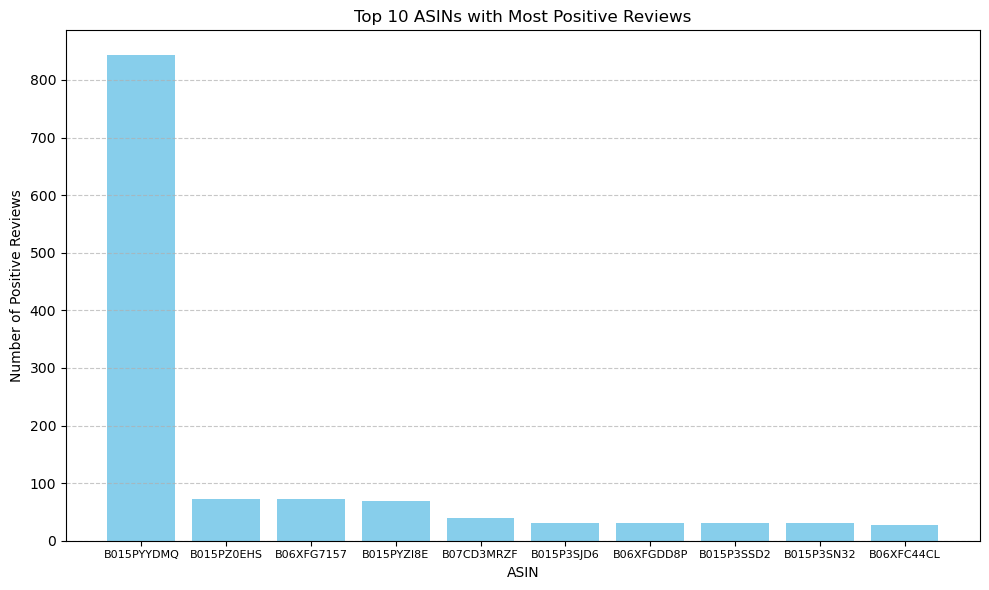

In [34]:
# Sort by total_positive and select the top 10 ASINs
top_asins = summary.sort_values(by='total_positive', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_asins['asin'], top_asins['total_positive'], color='skyblue')
plt.title('Top 10 ASINs with Most Positive Reviews')
plt.xlabel('ASIN')
plt.ylabel('Number of Positive Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Reduce font size of x-axis labels
plt.xticks(fontsize=8)  # Adjust fontsize here

plt.tight_layout()
plt.show()

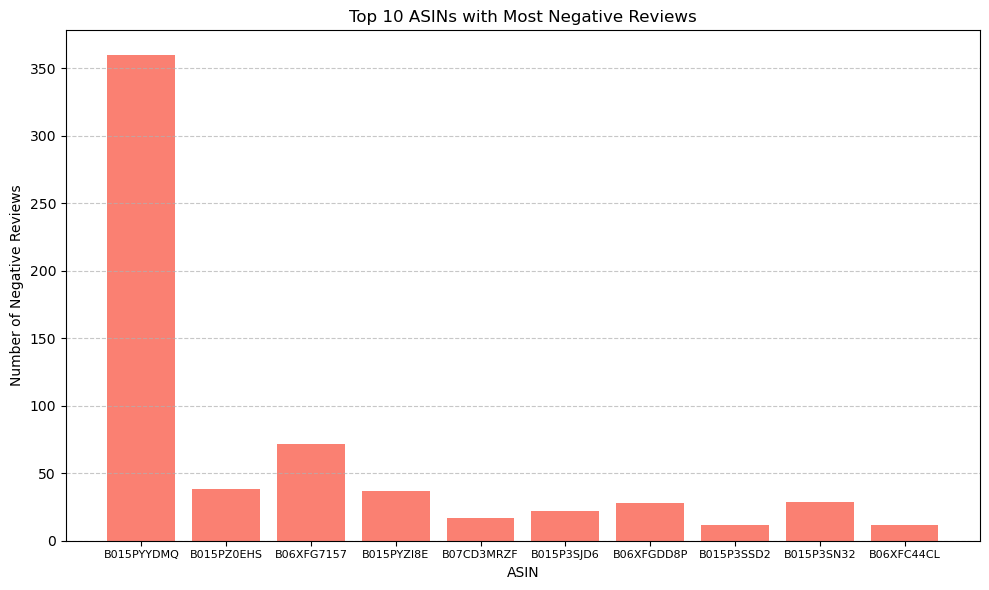

In [35]:
# Sort by total_positive and select the top 10 ASINs
bottom_asins = summary.sort_values(by='total_negative', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_asins['asin'], top_asins['total_negative'], color='salmon')
plt.title('Top 10 ASINs with Most Negative Reviews')
plt.xlabel('ASIN')
plt.ylabel('Number of Negative Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Reduce font size of x-axis labels
plt.xticks(fontsize=8)  # Adjust fontsize here

plt.tight_layout()
plt.show()

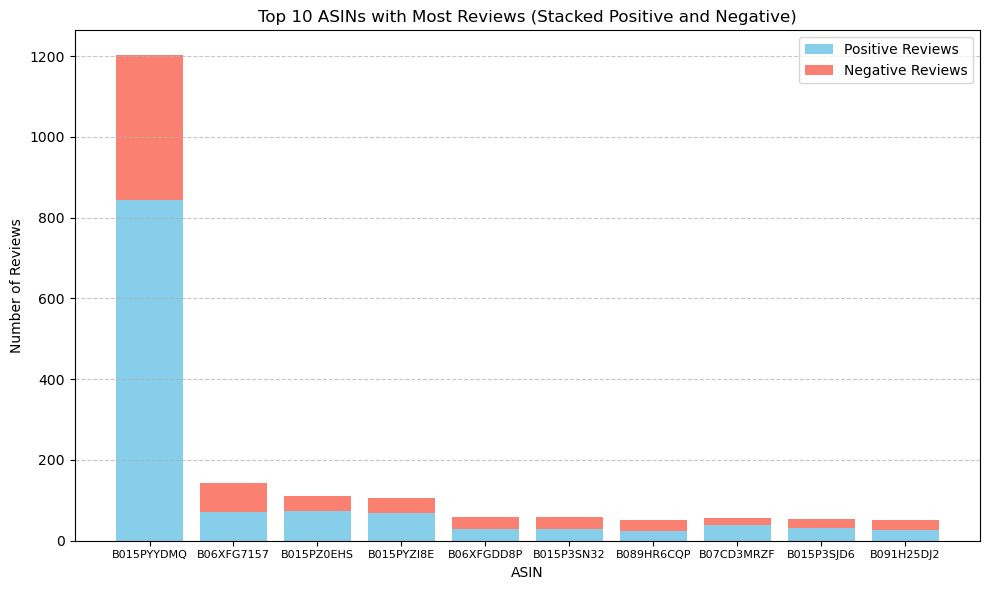

In [36]:
# Sort by total_reviews and select the top 10 ASINs
top_asins = summary.sort_values(by='num_reviews', ascending=False).head(10)

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_asins['asin'], top_asins['total_positive'], label='Positive Reviews', color='skyblue')
plt.bar(top_asins['asin'], top_asins['total_negative'], bottom=top_asins['total_positive'], label='Negative Reviews', color='salmon')

plt.title('Top 10 ASINs with Most Reviews (Stacked Positive and Negative)')
plt.xlabel('ASIN')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Reduce font size of x-axis labels
plt.xticks(fontsize=8)  # Adjust fontsize here

plt.tight_layout()
plt.show()

In [43]:
# Set constants
C = summary['avg_rating'].mean()  # Global average rating (e.g., ~4.5)
m = 10  # Minimum reviews to trust a rating

def calculate_amazon_style_score(row):
    # Bayesian average adjustment
    bayesian_avg = (row['num_reviews'] * row['avg_rating'] + C * m) / (row['num_reviews'] + m)
    
    # Logarithmic scaling for reviews and positives
    log_reviews = np.log(row['num_reviews'] + 1)
    log_positives = np.log(row['total_positive'] + 1)
    
    # Price penalty (scaled to [0,1])
    price_penalty = row['price'] / summary['price'].max()
    
    return (
        0.5 * bayesian_avg +       # Quality with Bayesian adjustment
        0.3 * log_reviews +        # Popularity (log-scaled)
        0.2 * log_positives -      # Positive sentiment (log-scaled)
        0.1 * price_penalty        # Value-for-money
    )

# Apply scoring
summary['score'] = summary.apply(calculate_amazon_style_score, axis=1)

# Filter out products with fewer than 5 reviews (adjust as needed)
summary_filtered = summary[summary['num_reviews'] >= 5]

# Get top 10
top_10_amazon_style = summary_filtered.sort_values('score', ascending=False).head(10)






In [44]:
top_10_amazon_style[['asin', 'title_y', 'avg_rating', 'num_reviews', 'total_positive', 'price', 'score']]

,asin,title_y,avg_rating,num_reviews,total_positive,price,score
27,B015PYYDMQ,FusionTech 15.6-Inch Gaming Laptop (6th Gen In...,3.980432,1482,844,769.00,5.508030
50,B06XFC44CL,"FusionTech Worktop i5577-7342BLK-PUS,15.6"" Gam...",4.142857,49,28,947.99,3.846273
20,B015P3SJD6,Advance AW17R3-4175SLV 17.3-Inch FHD Laptop (6...,3.721311,61,31,1299.99,3.748809
25,B015P3SSD2,Advance AW17R3-4175SLV 17.3-Inch FHD Laptop (6...,3.891304,46,30,1299.99,3.726333
140,B089HR6CQP,"FusionTech Gaming G3 15 3500, 15.6 inch FHD La...",3.369231,65,25,799.00,3.586561
160,B091H25DJ2,"FusionTech Worktop 13 5310, 13.3 inch QHD (Qua...",3.355932,59,26,1350.00,3.547221
134,B081K9QZDF,"FusionTech Worktop 17 17.3"" i3793-7275SLV-PUS ...",3.848485,33,19,1699.00,3.506475
119,B07T1DTF4F,FusionTech - ABC7590-7572SLV-PUS ABC 15 7590 L...,3.619048,42,19,1088.63,3.505128
112,B07RCP7ZV8,FusionTech G7 17 Gaming Laptop (Windows 10 Hom...,3.969697,33,12,961.49,3.485268
17,B00SIJG8PQ,"Advance 13 ANW13-8636SLV - 13.3"" Touchscreen G...",3.687500,32,20,649.99,3.471405


In [61]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd

# URL to fetch the product codes
url = "https://wits.worldbank.org/API/V1/wits/datasource/trn/product/all"

# Fetch the XML data
response = requests.get(url)
response.raise_for_status()

# Parse the XML content with namespace
root = ET.fromstring(response.content)
ns = {'wits': 'http://wits.worldbank.org'}

# Extract product information into a list of dictionaries
products = []
for product in root.findall('.//wits:product', ns):
    product_code = product.get('productcode')
    nomenclature_code = product.get('nomenclaturecode')
    # Find the productdescription child element
    desc_elem = product.find('wits:productdescription', ns)
    product_description = desc_elem.text if desc_elem is not None else None
    products.append({
        "product_code": product_code,
        "product_description": product_description,
        "nomenclature_code": nomenclature_code
    })

# Convert the list of dictionaries into a pandas DataFrame
product_codes = pd.DataFrame(products)




In [62]:
product_codes

,product_code,product_description,nomenclature_code
0,010110,010110 -- (2002-2011) - Pure-bred breeding ani...,HS
1,010111,010111 -- (-2001) -- Pure-bred breeding animals,HS
2,010119,010119 -- (-2001) -- Other,HS
3,010120,"010120 -- (-2001) - Asses, mules and hinnies",HS
4,010121,010121 -- (2012-) -- Pure-bred breeding animals,HS
...,...,...,...
6877,970531,970531 -- (2022) -- Collections and collectors...,HS
6878,970539,970539 -- (2022) -- Collections and collectors...,HS
6879,970600,970600 -- Antiques of an age exceeding 100 years,HS
6880,970610,970610 -- (2022) -- Antiques; of an age exceed...,HS


In [ ]:
def is_tech_item(row):
    # HS codes for tech: 84 (machinery, computers), 85 (electronics), 90 (instruments), 91 (clocks), 92 (musical instruments, some electronics), 93 (arms, some electronics)
    tech_prefixes = ('84', '85', '90', '91', '92', '93')
    code = str(row['product_code'])
    desc = str(row['product_description']).lower() if row['product_description'] else ''
    
    # # Check if code starts with tech prefix
    # if code.startswith(tech_prefixes):
    #     return True
    
    # Check for tech keywords in description
    tech_keywords = [
        'computer', 'laptop', 'notebook', 'tablet', 'server', 'processor', 'cpu', 'monitor',
        'printer', 'scanner', 'projector', 'router', 'modem', 'switch', 'memory', 'ram', 'ssd',
        'hdd', 'hard disk', 'motherboard', 'graphics card', 'gpu', 'display', 'keyboard', 'mouse',
        'smartphone', 'mobile phone', 'cell phone', 'television', 'tv', 'camera', 'video', 'audio',
        'semiconductor', 'integrated circuit', 'microchip', 'electronic', 'instrument', 'measuring',
        'telecom', 'network', 'data processing', 'automation', 'robot', 'drone', 'sensor', 'software'
    ]
    if any(kw in desc for kw in tech_keywords):
        return True
    
    return False

# Filter DataFrame to only tech items
tech_products = product_codes[product_codes.apply(is_tech_item, axis=1)].reset_index(drop=True)

print(f"Original count: {len(product_codes)}")
print(f"Tech items count: {len(tech_products)}")
print(tech_products[['product_code', 'product_description']].head(20))




NameError: name 'desc' is not defined

In [69]:
print(tech_products[['product_code', 'product_description']])

     product_code                                product_description
0          030193  030193 --  -- Carp (Cyprinus spp., Carassius s...
1          030252  030252 -- (2012-) -- Haddock (Melanogrammus ae...
2          030255  030255 -- (2012-) -- Alaska pollock (Theragra ...
3          030262  030262 -- (-2011) -- Haddock (Melanogrammus ae...
4          030273  030273 -- (2012-) -- Carp (Cyprinus spp., Cara...
...           ...                                                ...
1455       950350  950350 -- (-2006) - Toy musical instruments an...
1456       950410  950410 -- (-2011) - Video games of a kind used...
1457       950450  950450 -- (2012-) - Video game consoles and ma...
1458       961000  961000 --  Slates and boards, with writing or ...
1459       961800  961800 --  Tailors' dummies and other lay figu...

[1460 rows x 2 columns]
